In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report

In [4]:
df=pd.read_csv("human resourse.zip")
print(df)

     employee_id  first_name    last_name  gender   state    city   hire_date  \
0    00-73695798   Olimpiada     Fedotova  Female  Moscow  Moscow  2017-08-28   
1    00-81018730     Ljubov'     Baranova  Female  Moscow  Moscow  2022-05-19   
2    00-29139495    Mstislav     Trofimov    Male  Moscow  Moscow  2018-04-10   
3    00-60298696      Rodion      Pahomov    Male  Moscow  Moscow  2019-11-11   
4    00-96356860      Zosima       Naumov    Male   Kazan   Kazan  2023-01-01   
..           ...         ...          ...     ...     ...     ...         ...   
720  00-33964768  Kallistrat  Ovchinnikov    Male  Moscow  Moscow  2022-01-16   
721  00-52644581     Vitalij      Mironov    Male  Moscow  Moscow  2018-08-26   
722  00-24298519       Sidor      Korolev    Male  Moscow  Moscow  2016-05-26   
723  00-24640648      Ljubim  Ovchinnikov    Male  Moscow  Moscow  2020-12-17   
724  00-49443745     Kondrat       Blohin    Male   Kazan   Kazan  2021-07-08   

           department      

In [5]:
df['Attrition'] = df ['termination_date'].notna().astype(int)

In [6]:
df.drop(columns=['employee_id','first_name','last_name','termination_date'],inplace=True)

In [7]:
df['hire_date'] = pd.to_datetime(df['hire_date'])
df['birth_date'] = pd.to_datetime(df['birth_date'])

df['age'] = (pd.Timestamp.today()-df['birth_date']).dt.days //365
df['experience_years'] = (pd.Timestamp.today() -df['hire_date']).dt.days //365

df.drop(columns=['hire_date','birth_date'],inplace=True)

# Encode Binary & Ordinal Features


In [8]:
df['gender']=df['gender'].map({'Male':1,'Female':0})
df['overtime']=df['overtime'].map({'Yes':1,'No':0})

education_map = {'High school':1,'Bachelor':2,'Master':3,'phD':4}
df['education_level']=df['education_level'].map(education_map)

performance_map ={
    'Needs Improvement':1,
    'Satisfactory':2,
    'Good':3,
    'Excellent':4
}
df['performance_rating']=df['performance_rating'].map(performance_map)

# One-Hot Encode Nominal Features

In [9]:
df=pd.get_dummies(
    df,
    columns=['state','city','department','job_title'],
    drop_first=True
)

# Split data

In [10]:
X = df.drop('Attrition',axis=1)
y=df['Attrition']

X_train,X_test,y_train,y_test =train_test_split(
    X,y,test_size=0.2,random_state=42,stratify=y
)

# Feature Scaling

In [11]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Model

In [12]:
model=RandomForestClassifier(random_state=42)
model.fit(X_train,y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


# Evaluation

In [13]:
y_pred=model.predict(X_test)
print("Accuracy:",accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy: 0.8896551724137931
              precision    recall  f1-score   support

           0       0.89      1.00      0.94       129
           1       0.00      0.00      0.00        16

    accuracy                           0.89       145
   macro avg       0.44      0.50      0.47       145
weighted avg       0.79      0.89      0.84       145



C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mod

# EDA

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1.Attrition Distibution


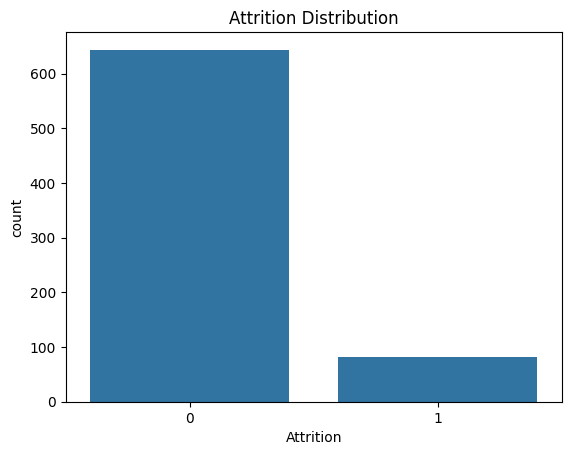

In [15]:
sns.countplot(x='Attrition',data=df)
plt.title("Attrition Distribution")
plt.show()

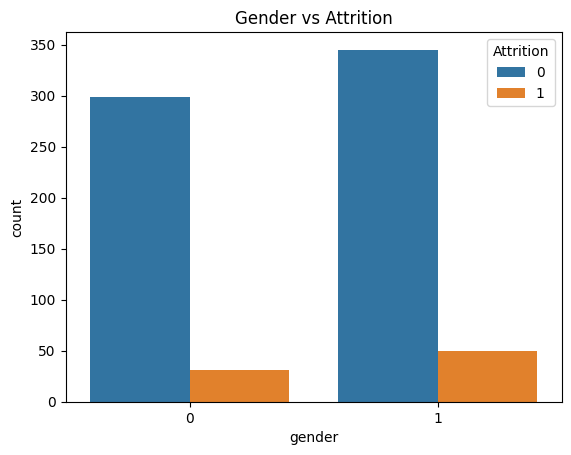

In [16]:
#gender vs attrition
sns.countplot(x='gender',hue='Attrition',data=df)
plt.title('Gender vs Attrition')
plt.show()

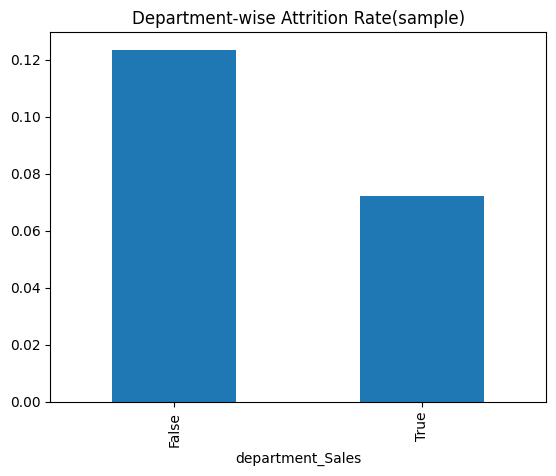

In [19]:
dept_attr = df.groupby('department_Sales')['Attrition'].mean()
dept_attr.plot(kind='bar')
plt.title('Department-wise Attrition Rate(sample)')
plt.show()

# 4.salary Distribution

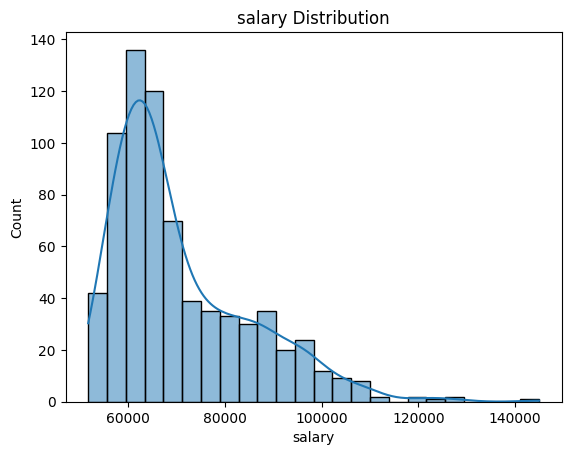

In [20]:
sns.histplot(df['salary'],kde=True)
plt.title("salary Distribution")
plt.show()

# 5.Salary vs Attrition

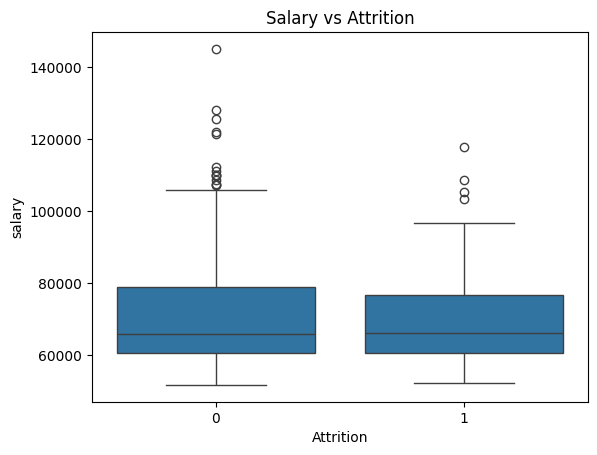

In [28]:
sns.boxplot(x='Attrition',y='salary',data=df)
plt.title('Salary vs Attrition')
plt.show()

# 6.Age Distribution

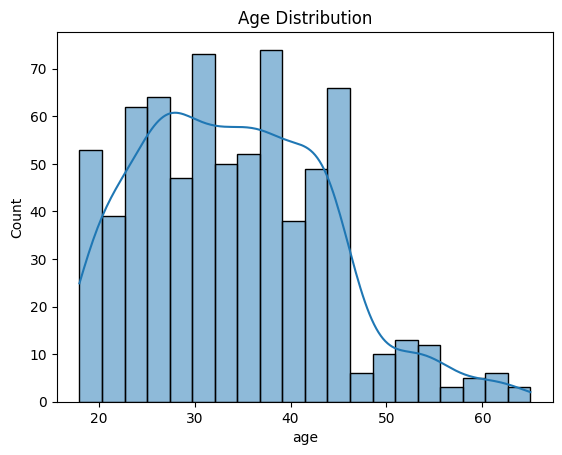

In [25]:
sns.histplot(df['age'],bins=20,kde=True)
plt.title("Age Distribution")
plt.show()

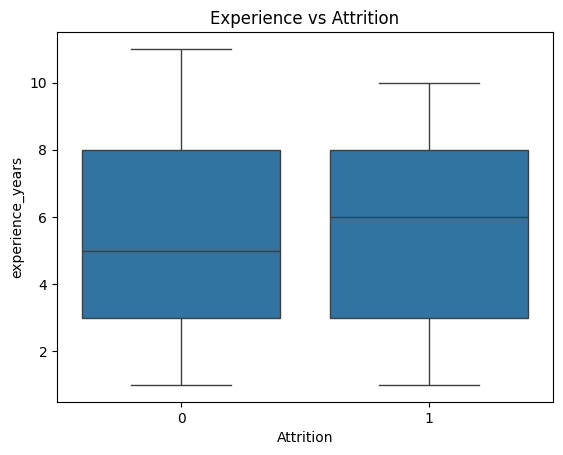

In [26]:
sns.boxplot(x='Attrition',y='experience_years',data=df)
plt.title("Experience vs Attrition")
plt.show()

# 8.Heatmap corelation

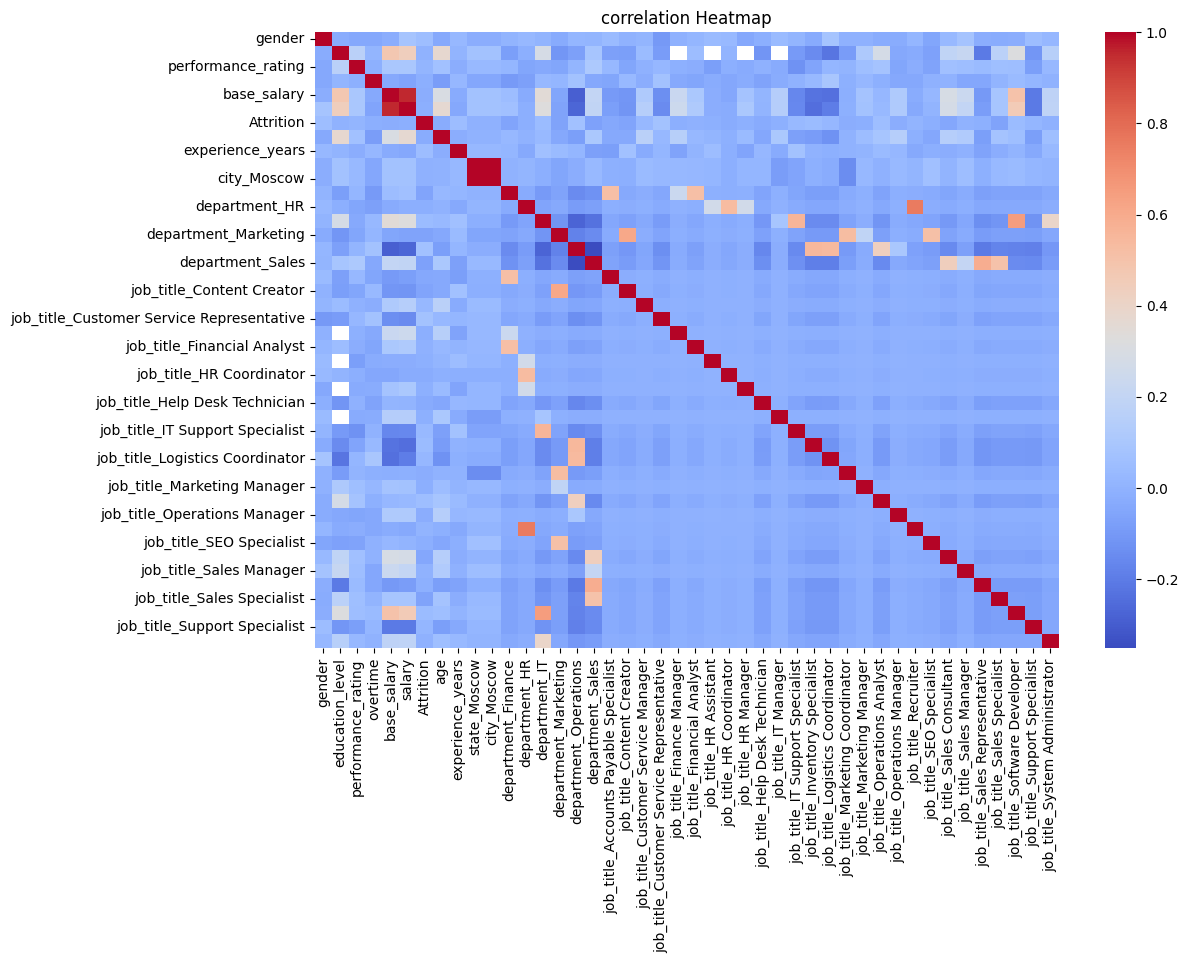

In [27]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),cmap='coolwarm')
plt.title("correlation Heatmap")
plt.show()

In [29]:
df['salary_difference']=df['salary']-df['base_salary']

In [30]:
df.groupby('Attrition')['salary_difference'].mean()

Attrition
0    7541.083851
1    7636.061728
Name: salary_difference, dtype: float64

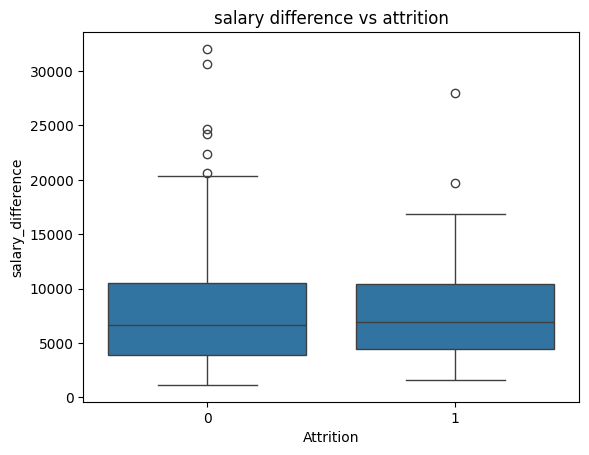

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x="Attrition",y="salary_difference",data=df)
plt.title("salary difference vs attrition")
plt.show()